In [10]:
import numpy as np
import pandas as pd

df = pd.read_csv("SAKI Exercise 1 - Transaction Classification - Data Set.csv", sep=';')
df.head()

,Unnamed: 0,Auftragskonto,Buchungstag,Valutadatum,Buchungstext,Verwendungszweck,Beguenstigter/Zahlungspflichtiger,Kontonummer,BLZ,Betrag,Waehrung,label
0,0,89990201.0,28.07.2016,28.07.2016,Lohn / Gehalt,Gehalt Adorsys GmbH & Co. KG End-To-End-Ref.: ...,Adorsys GmbH & Co. KG,7807800780,25190001,2000.00,EUR,income
1,1,89990201.0,27.07.2016,27.07.2016,Miete,Byladem1Sbt De12773501123456789889 Miete Beuth...,Georg Tasche,DE31251900019123456780,VOHADE2HXXX,-670.00,EUR,living
2,2,89990201.0,21.07.2016,21.07.2016,Bargeld,"21.07/16.34Uhr Nuernberg All Eur 70,00 Geb.Eur...",Bargeld,9999900780,25190001,-70.00,EUR,private
3,3,89990201.0,20.07.2016,20.07.2016,Lebensmittel / Getraenke,2831 Edeka Neubauer Nuernb.//Nuernb 2016-07-20...,Kartenzahlung,9736000780,25190001,-73.21,EUR,standardOfLiving
4,4,89990201.0,18.07.2016,18.07.2016,Spontanausgabe,Amazon,neue Playstation,9988776655,25125100,-363,EUR,leisure


In [12]:
from scipy.stats import entropy

pd_series = pd.Series(df['Auftragskonto'])
entropy = entropy(pd_series.value_counts())
print('Entropy of "Auftragskonto": ' + str(entropy))

Entropy of "Auftragskonto": 3.3427761144821067


Entropy of "Waehrung": 0.0

Accuracy: 0.9017358490566038


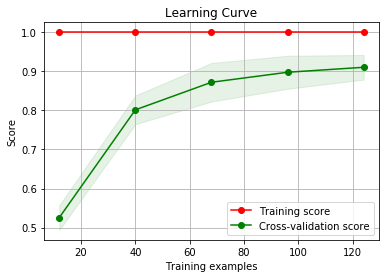

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import scikitplot as skplt

dummies = pd.get_dummies(df[['Buchungstag','Valutadatum','Buchungstext', 
               'Verwendungszweck','Beguenstigter/Zahlungspflichtiger', 
               'Kontonummer','BLZ','Betrag']])
labels = df[['label']]

times = 500
accuracy = 0
for i in range(times):
    X_train, X_test, y_train, y_test = train_test_split(dummies, labels)

    model = GaussianNB()
    model.fit(X_train, y_train.values.ravel())
    
    y_pred = model.predict(X_test)
    accuracy += accuracy_score(y_test, y_pred)

print('Accuracy: ' + str(accuracy/times))

skplt.estimators.plot_learning_curve(model, X_train, y_train.values.ravel())
plt.show()

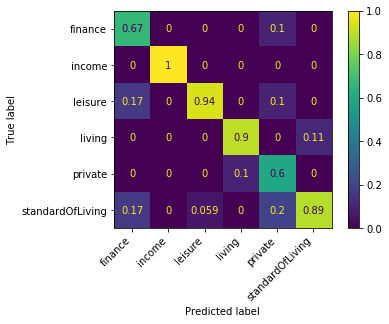

In [4]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model, X_test, y_test, normalize='pred')
plt.xticks(rotation=45, ha='right')
plt.show()  